Import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

Control parameters.

In [2]:
theta = np.pi/4 #affects graphs and movies
n = 100         #affects movies
beta = 0.000001 #affects graphs

calculations

In [3]:
t = np.linspace(0,2*np.pi,1000)
nbetadot = -beta*np.sin(theta)*np.sin(t)
nbeta    = beta*np.cos(t)*np.sin(theta)
denom = (1-beta*np.sin(theta)*np.cos(t))**3

xterm = beta*np.sin(t)*nbetadot - beta*np.cos(t)*(1 - nbeta)
yterm = nbetadot*(np.sin(theta)-beta*np.cos(t)) + beta*np.sin(t)*(1-nbeta)
zterm = np.cos(theta)*nbetadot
Ex = xterm/denom
Ey = yterm/denom
Ez = zterm/denom 

Plotting the components of the electric fields

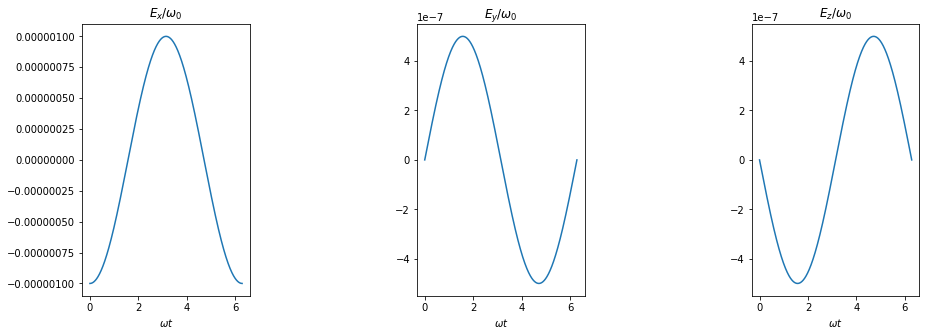

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(t,Ex)
plt.title(r'$E_{x}/\omega_{0}$')
plt.xlabel(r'$\omega t$')
plt.subplot(132)
plt.plot(t,Ey)
plt.title(r'$E_{y}/\omega_{0}$')
plt.xlabel(r'$\omega t$')
plt.subplot(133)
plt.plot(t,Ez)
plt.title(r'$E_{z}/\omega_{0}$')
plt.xlabel(r'$\omega t$')
plt.subplots_adjust(wspace = 1)

Calculating the power as a function of time, and graphing it

Text(0.5, 0, '$\\omega t$')

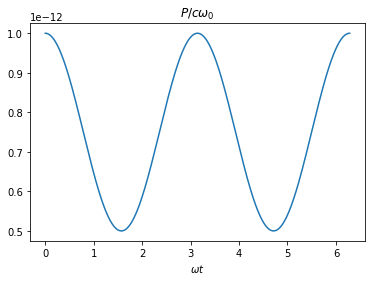

In [5]:
p = (xterm**2 + yterm**2 + zterm**2)/denom**2

plt.figure()
plt.plot(t,p)
plt.title(r'$P/c\omega_{0}$')
plt.xlabel(r'$\omega t$')

Animating the Electric Fields and Power

In [ ]:
fig, ((ax11, ax12), (ax21,ax22)) = plt.subplots(2,2,sharex = False,
                                         sharey=False,
                                         figsize = (15,10))


line1, = ax11.plot([],[])
line2, = ax12.plot([],[])
line3, = ax21.plot([],[])
line4, = ax22.plot([],[])
def init():
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    line4.set_data([],[])
    return (line1,line2,line3,line4,)

def movie(fig,theta,n):
    def animate(i):
        beta = 0.0001 + (0.9999-0.0001)*i/n
        t = np.linspace(0,2*np.pi,1000)
        nbetadot = -beta*np.sin(theta)*np.sin(t)
        nbeta    = beta*np.cos(t)*np.sin(theta)
        denom = (1-beta*np.sin(theta)*np.cos(t))**3

        xterm = beta*np.sin(t)*nbetadot - beta*np.cos(t)*(1 - nbeta)
        yterm = nbetadot*(np.sin(theta)-beta*np.cos(t)) + beta*np.sin(t)*(1-nbeta)
        zterm = np.cos(theta)*nbetadot
        Ex = xterm/denom
        Ey = yterm/denom
        Ez = zterm/denom 
        p = (xterm**2 + yterm**2 + zterm**2)/denom**2
        line1.set_data(t,Ex)
        line2.set_data(t,Ey)
        line3.set_data(t,Ez)
        line4.set_data(t,p)
        ax11.set_title(r'$E_{x}/\omega_{0}: \beta = $' + str(beta))
        ax12.set_title(r'$E_{y}/\omega_{0}: \beta = $' + str(beta))
        ax21.set_title(r'$E_{x}/\omega_{0}: \beta = $' + str(beta))
        ax22.set_title(r'$P/c\omega_{0}$')
        return(line1,line2,line3,line4,)
    
    anim = animation.FuncAnimation(fig, animate,frames = 500, interval=20 ,init_func=init,
                               blit=False)
    HTML(anim.to_html5_video())
    HTML(anim.to_jshtml())
movie(fig,theta,n)